In [3]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
tk = th.Thicket.from_caliperreader(glob("SpeedupSample/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 35/35 [00:00<00:00, 656.00it/s]
/home/alex/Project_2024/new_env/lib/python3.12/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [5]:
tk.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
71036787,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a268435456-ssample-isorted.cali,true,true,true,true,1729585098,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, sorted]",c,sample,mpi,int,4,268435456,sorted,16,8,online,strong
295533304,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a268435456-ssample-isorted.cali,true,true,true,true,1729585098,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, sorted]",c,sample,mpi,int,4,268435456,sorted,8,8,online,strong
430275413,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p4-a268435456-ssample-i1perturbed.cali,true,true,true,true,1729585156,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, 1perturbed]",c,sample,mpi,int,4,268435456,1perturbed,4,8,online,strong
566693142,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a268435456-ssample-i1perturbed.cali,true,true,true,true,1729585156,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, 1perturbed]",c,sample,mpi,int,4,268435456,1perturbed,8,8,online,strong
613114193,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a268435456-ssample-ireverse.cali,true,true,true,true,1729585156,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, reverse]",c,sample,mpi,int,4,268435456,reverse,16,8,online,strong


In [6]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

22.468 main
├─ 7.019 MPI_Comm_dup
├─ 0.021 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 1.592 comm
│  ├─ 0.473 comm_large
│  │  ├─ 0.137 MPI_Alltoall
│  │  ├─ 0.021 MPI_Alltoallv
│  │  ├─ 0.015 MPI_Gather
│  │  ├─ 0.164 MPI_Gatherv
│  │  └─ 0.136 MPI_Scatter
│  └─ 1.118 comm_small
│     └─ 1.118 MPI_Bcast
├─ 11.915 comp
│  ├─ 11.836 comp_large
│  └─ 0.079 comp_small
├─ 0.461 correctness_check
└─ 0.499 data_init_runtime
   └─ 0.194 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 22.47 indices: {'profile': np.int64(71036787)})
█ 20.22 - 22.47
█ 15.73 - 20.22
█ 11.23 - 15.73
█ 6.74 - 11.23
█ 2.25 - 6.74
█ 0.00 - 2.25

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("algorithm")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,"{'name': 'main', 'type': 'function'}",71036787,1.0,regionprofile,22.466549,22.468385,22.467732,359.483709,0.000001,0.955482,0.964525,0.961141,15.378260,NaN,NaN,NaN,NaN,main,16,sorted,268435456,sample
1,"{'name': 'main', 'type': 'function'}",295533304,1.0,regionprofile,50.932230,50.940188,50.934255,407.474042,0.000007,0.762299,0.785315,0.778949,6.231593,NaN,NaN,NaN,NaN,main,8,sorted,268435456,sample
2,"{'name': 'main', 'type': 'function'}",430275413,1.0,regionprofile,176.671304,176.676163,176.672989,706.691954,0.000004,0.774071,0.785393,0.779442,3.117769,NaN,NaN,NaN,NaN,main,4,1perturbed,268435456,sample
3,"{'name': 'main', 'type': 'function'}",566693142,1.0,regionprofile,93.894051,93.894873,93.894757,751.158057,0.000000,1.055902,1.062604,1.060012,8.480099,NaN,NaN,NaN,NaN,main,8,1perturbed,268435456,sample
4,"{'name': 'main', 'type': 'function'}",613114193,1.0,regionprofile,21.324917,21.327365,21.326578,341.225253,0.000001,0.950811,0.962881,0.960180,15.362883,NaN,NaN,NaN,NaN,main,16,reverse,268435456,sample


In [8]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

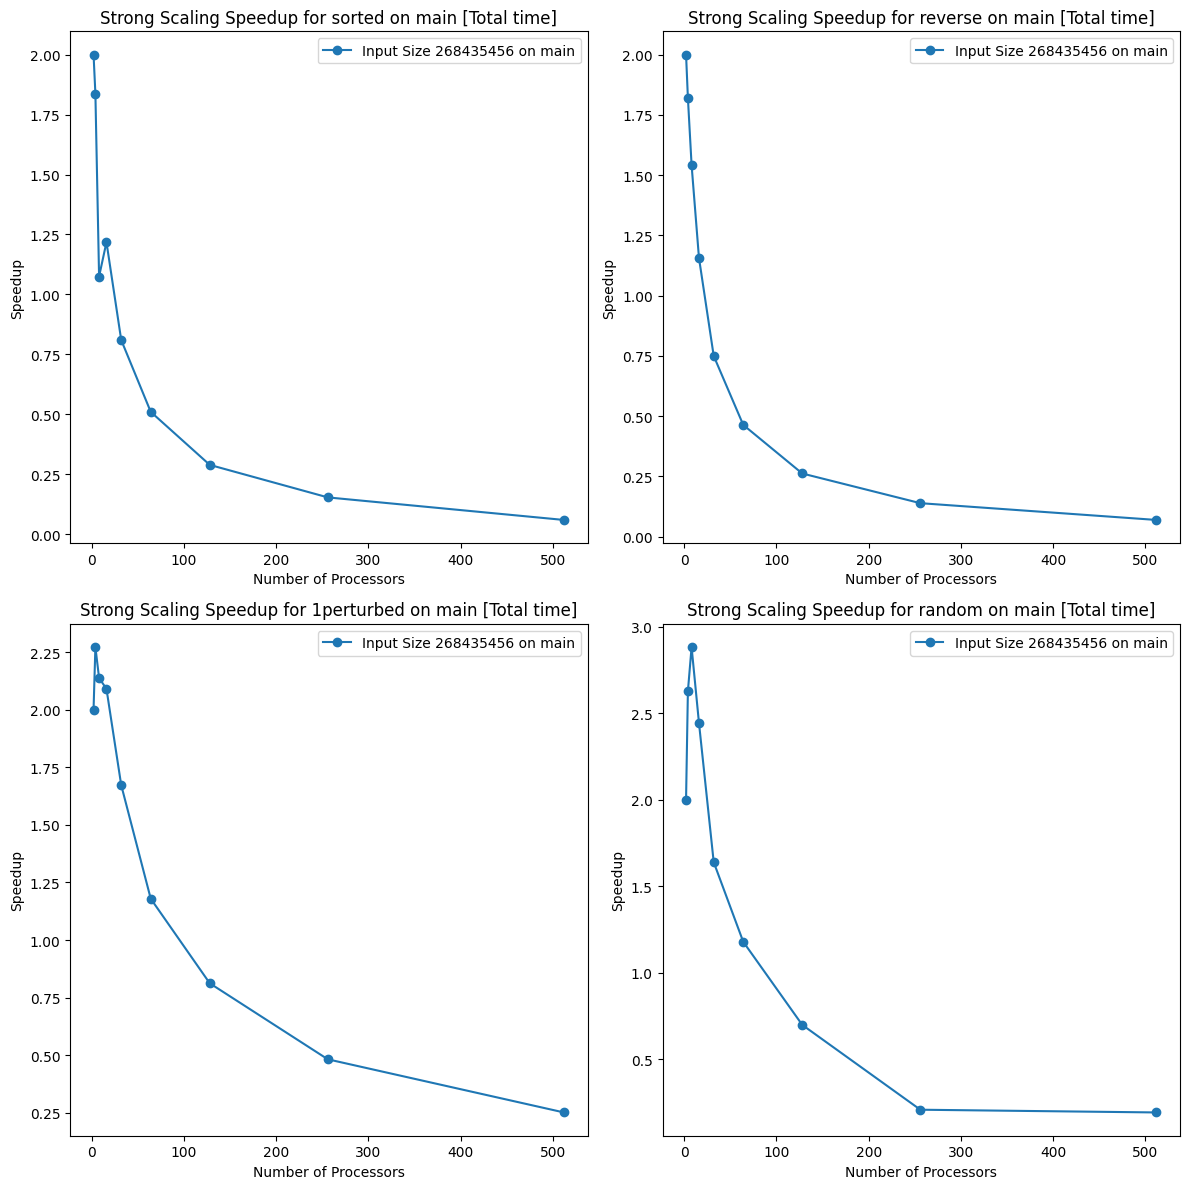

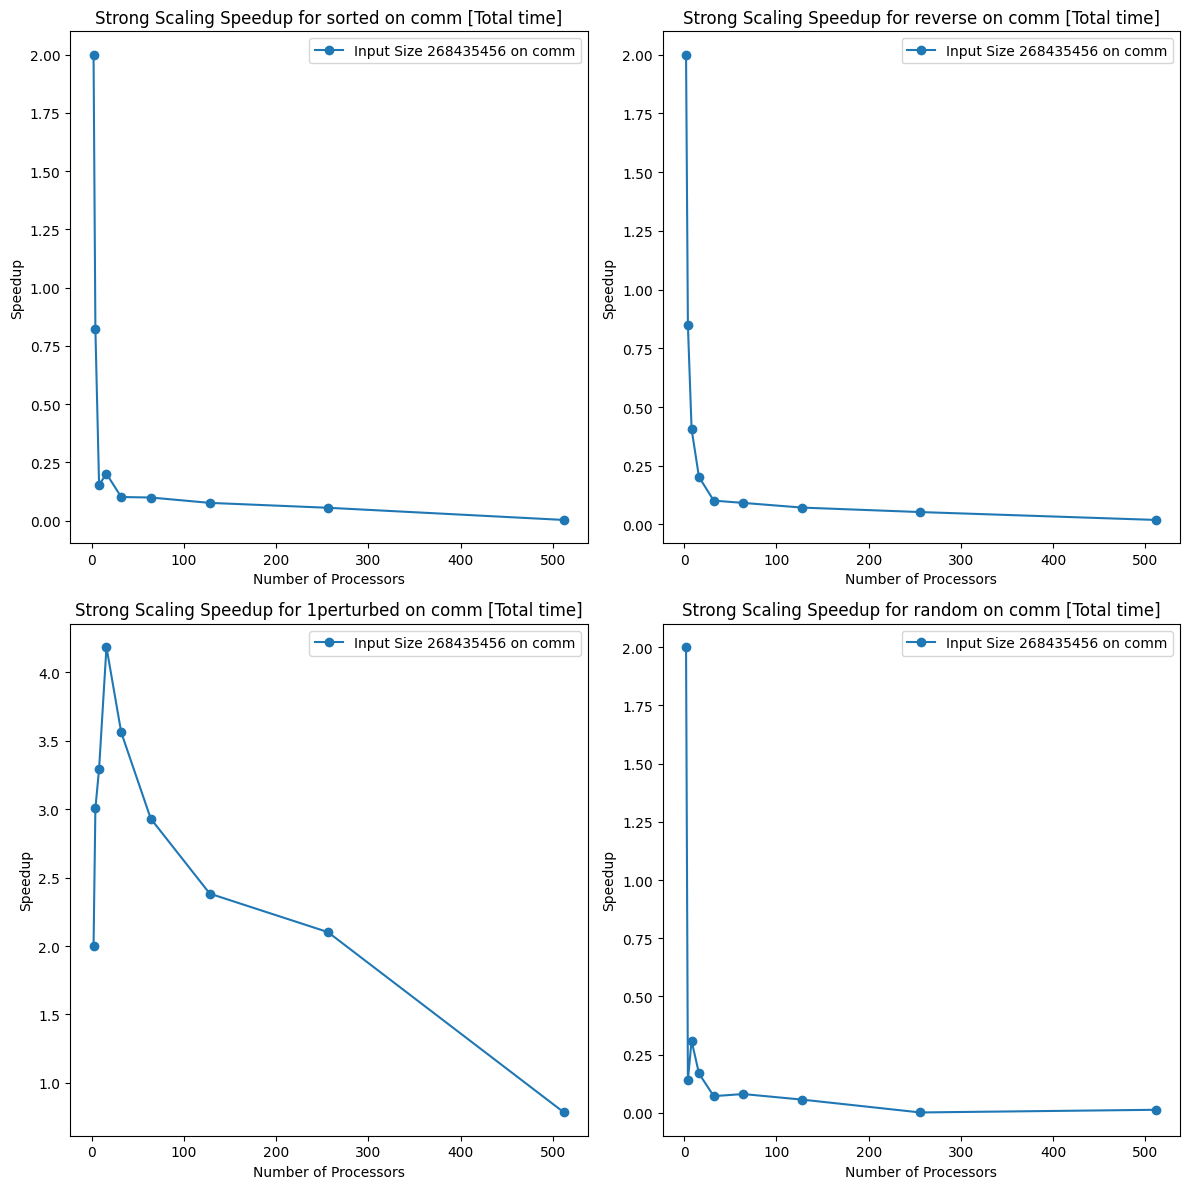

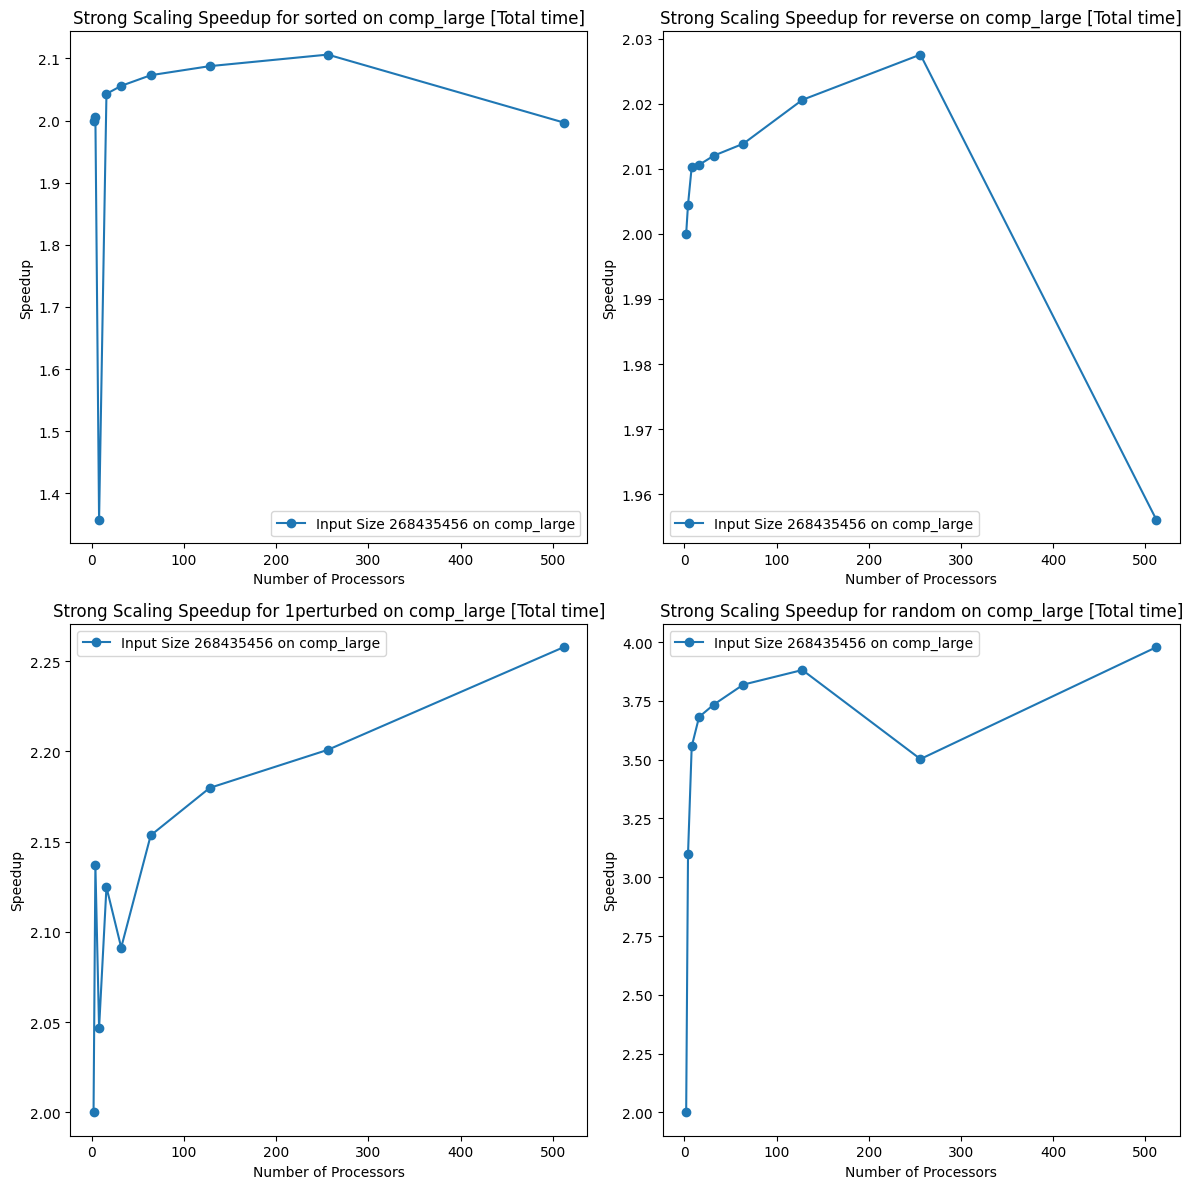

In [13]:
import os

input_sizes = [268435456] # Largest problem size
input_types = ["sorted", "reverse", "1perturbed", "random"]

# Change "type_selector" to the index of what you want to measure
time_types = ["Min time/rank", "Max time/rank", "Avg time/rank", "Total time", "Variance time/rank"]
file_output_label = ["min", "max", "avg", "total", "variance"]
type_selector = 4

# Prepare output folder for plots
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to create strong scaling speedup plots with 2x2 subplots
def plot_speedup(tk, input_types):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
            fig, axs = plt.subplots(2, 2, figsize=(12, 12))
            
            axs = axs.flatten()
            for idx, input_type in enumerate(input_types):
                ax = axs[idx]
                
                # Add node filter to baseline calculation
                baseline_time = tk.dataframe[
                    (tk.dataframe["num_procs"] == 2) & 
                    (tk.dataframe["input_type"] == input_type) &
                    (tk.dataframe['node'] == node)  # Added node filter
                ][time_types[type_selector]].values[0] * 2
                
                for input_size in input_sizes:
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) & 
                        (tk.dataframe["input_size"] == input_size) & 
                        (tk.dataframe['node'] == node)
                    ]
                    data = data.sort_values(by="num_procs")
                    
                    speedup = baseline_time / data[time_types[type_selector]]
                    ax.plot(data["num_procs"], speedup, marker='o', 
                           label=f'Input Size {input_size} on {node_name}')
                
                ax.set_title(f'Strong Scaling Speedup for {input_type} on {node_name} [{time_types[type_selector]}]')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Speedup')
                ax.legend()
            
            for j in range(idx + 1, len(axs)):
                fig.delaxes(axs[j])
            
            plt.tight_layout()
            filename = f'speedup_{file_output_label[type_selector]}_{input_type}_{node_name}_size{input_size}.png'
            filepath = os.path.join(output_dir, filename)
            plt.savefig(filepath, format='png', dpi=300)
            plt.show()



plot_speedup(tk, input_types)

In [10]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe

,index,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,0,"{'name': 'main', 'type': 'function'}",71036787,1.0,regionprofile,22.466549,22.468385,22.467732,359.483709,0.000001,0.955482,0.964525,0.961141,15.378260,NaN,NaN,NaN,NaN,main,16,sorted,268435456,sample
1,1,"{'name': 'main', 'type': 'function'}",295533304,1.0,regionprofile,50.932230,50.940188,50.934255,407.474042,0.000007,0.762299,0.785315,0.778949,6.231593,NaN,NaN,NaN,NaN,main,8,sorted,268435456,sample
2,2,"{'name': 'main', 'type': 'function'}",430275413,1.0,regionprofile,176.671304,176.676163,176.672989,706.691954,0.000004,0.774071,0.785393,0.779442,3.117769,NaN,NaN,NaN,NaN,main,4,1perturbed,268435456,sample
3,3,"{'name': 'main', 'type': 'function'}",566693142,1.0,regionprofile,93.894051,93.894873,93.894757,751.158057,0.000000,1.055902,1.062604,1.060012,8.480099,NaN,NaN,NaN,NaN,main,8,1perturbed,268435456,sample
4,4,"{'name': 'main', 'type': 'function'}",613114193,1.0,regionprofile,21.324917,21.327365,21.326578,341.225253,0.000001,0.950811,0.962881,0.960180,15.362883,NaN,NaN,NaN,NaN,main,16,reverse,268435456,sample
5,5,"{'name': 'main', 'type': 'function'}",648341471,1.0,regionprofile,98.699066,98.699071,98.699068,197.398137,0.000000,0.737181,0.742511,0.739846,1.479693,NaN,NaN,NaN,NaN,main,2,reverse,268435456,sample
6,6,"{'name': 'main', 'type': 'function'}",735825621,1.0,regionprofile,54.218440,54.219523,54.219226,216.876902,0.000000,0.623419,0.630428,0.625571,2.502284,NaN,NaN,NaN,NaN,main,4,reverse,268435456,sample
7,7,"{'name': 'main', 'type': 'function'}",773033178,1.0,regionprofile,12.844781,12.859899,12.850543,1644.869469,0.000012,1.604577,1.640592,1.623082,207.754541,NaN,NaN,NaN,NaN,main,128,random,268435456,sample
8,8,"{'name': 'main', 'type': 'function'}",904023410,1.0,regionprofile,11.751528,11.771779,11.758841,1505.131601,0.000019,1.591680,1.634214,1.612970,206.460188,NaN,NaN,NaN,NaN,main,128,reverse,268435456,sample
9,9,"{'name': 'main', 'type': 'function'}",910828563,1.0,regionprofile,16.895126,16.902081,16.899128,540.772098,0.000007,1.531203,1.543215,1.537646,49.204670,NaN,NaN,NaN,NaN,main,32,sorted,268435456,sample
